In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emails_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Assignments/Assignment1/Emails.csv')
emails_raw.head(3)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


---

## 1) Data Cleaning and Preprocessing

- handling missing values
- removing duplicates
- standardizing date formats

In [ ]:
# splitting the combined date/time column and creating a separate
# column for each.
date_time = emails_raw['MetadataDateSent'].str.split('T')
date = date_time.str[0]
time_temp = date_time.str[1]
time = time_temp.str.split('+').str[0]

In [ ]:
emails_raw['Date'] = date # format: YYYY-MM-DD
emails_raw['Time'] = time # format: HH:MM:SS
emails_raw.head(3)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,Date,Time
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,2012-09-12,04:00:00
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,2011-03-03,05:00:00
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,2012-09-12,04:00:00


In [ ]:
# creating a new df with only columns of interest and renaming columns for simplicity
emails_clean = emails_raw[['MetadataSubject',
                           'MetadataTo',
                           'MetadataFrom',
                           'ExtractedBodyText',
                           'Time',
                           'Date'
                          ]]
emails_clean.columns = ['Subject','Recipient','Sender','Body','Time','Date']
emails_clean.head(3)

,Subject,Recipient,Sender,Body,Time,Date
0,WOW,H,"Sullivan, Jacob J",NaN,04:00:00,2012-09-12
1,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",05:00:00,2011-03-03
2,CHRIS STEVENS,;H,"Mills, Cheryl D",Thx,04:00:00,2012-09-12


In [ ]:
# dropping missing values
emails_clean = emails_clean.dropna()

In [ ]:
# removing duplicates
emails_clean.drop_duplicates(inplace = True)

---

## 2) Exploratory Data Analysis

- employing statistical and visualization techniques to summarize the dataset's main characteristics
    - distribution of emails over time
    - most frequent senders and recipients
    - length of emails


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Distribution of emails over time:
y_num_dates = list(emails_clean['Date'].value_counts())

In [ ]:
x_dates = emails_clean['Date'].unique()

In [ ]:
time_dict = {}
for i in range(len(x_dates)):
    time_dict[x_dates[i]] = sum(emails_clean['Date'] == (x_dates[i]))

In [ ]:
date = list(time_dict.keys())
count = list(time_dict.values())

<Axes: xlabel='date', ylabel='# of emails'>

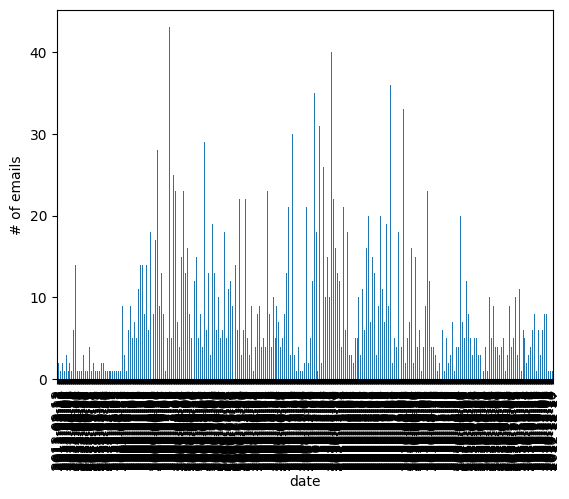

In [ ]:
# Emails by date (I have not taken Data Visualization yet so I know that these
# graphs are not the best, sorry :( I could not figure out how to fix
# the labels for the dates)
emails_clean['Date'].value_counts(sort = False).plot(kind = 'bar',
                                                    ylabel = '# of emails',
                                                    xlabel = 'date',
                                                    )


<Axes: >

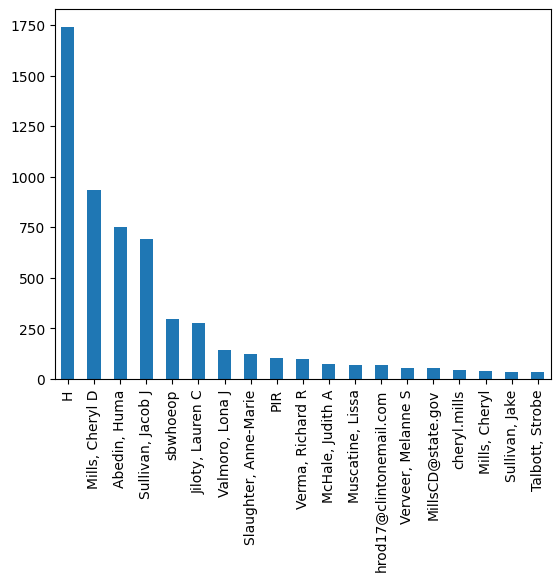

In [ ]:
# top 20 most frequent senders
emails_clean['Sender'].value_counts()[0:19].plot(kind = 'bar')

<Axes: >

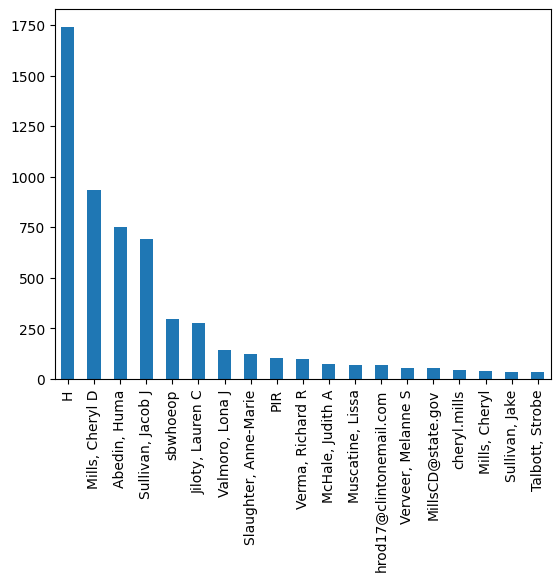

In [ ]:
# top 20 most frequent senders other than "H"
emails_clean['Sender'].value_counts()[0:19].plot(kind = 'bar')

<Axes: >

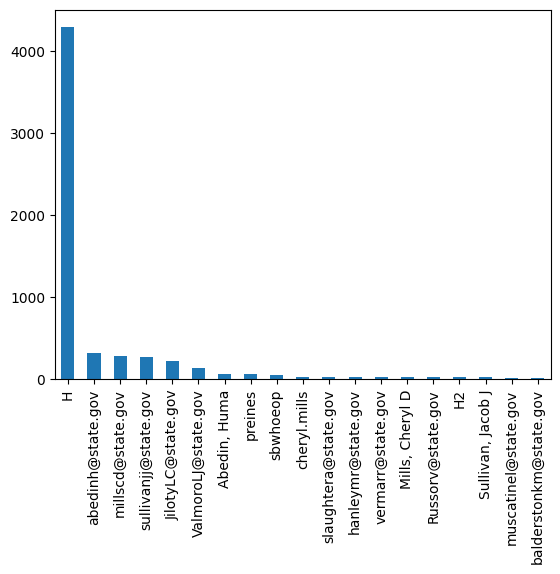

In [ ]:
# top 20 most frequent recipients
emails_clean['Recipient'].value_counts()[0:19].plot(kind = 'bar')

<Axes: >

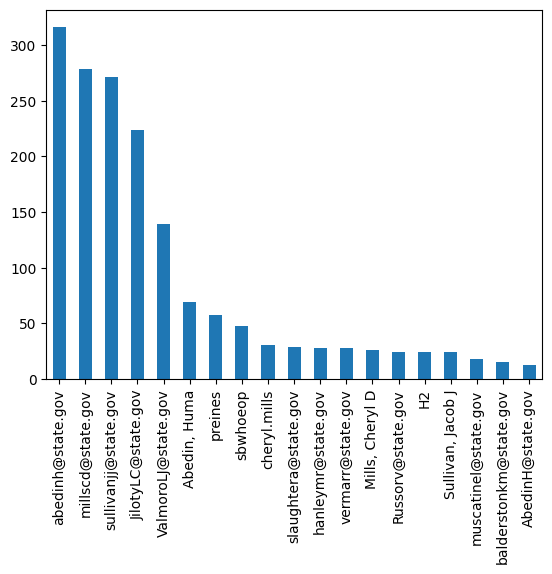

In [ ]:
# top 20 most frequent recipients other than "H"
emails_clean['Recipient'].value_counts()[1:20].plot(kind = 'bar')

A lot of these names and emails appear to be the same people. For example, 'millscd@state.gov' is likely 'Mills, Cheryl D' and 'cheryl.mills'. Similarly 'sullivanjj@state.gov' is likely the same person as 'Sullivan Jacob J.'

In [ ]:
# distribution of email lengths (only body text)

email_length = []
for i in range(len(emails_clean['Body'])):
    email_length.append(len(list(emails_clean['Body'])[i]))

In [ ]:
from collections import Counter
length_counts = dict(Counter(email_length))

In [ ]:
emails_clean['char_total'] = emails_clean['Body'].apply(lambda x: len(x))
emails_clean['char_total'].describe()

count     6362.000000
mean       517.701823
std       2617.398185
min          1.000000
25%         26.000000
50%         82.000000
75%        195.000000
max      78834.000000
Name: char_total, dtype: float64

<Axes: ylabel='Frequency'>

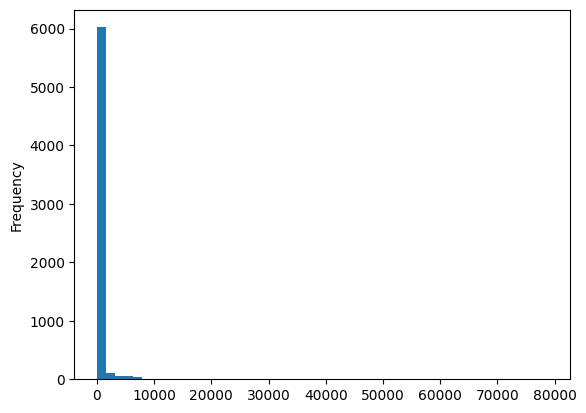

In [ ]:
emails_clean['char_total'].plot(kind='hist', bins=50)

---

## 3) TF-IDF
- generate a list of 5 TF-IDF terms that best describe the emails

In [ ]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import string
import re

In [ ]:
from tqdm import tqdm
tqdm.pandas()

punctuation = list(string.punctuation)
NLP = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

---

### Preprocessing before TF-IDF

In [ ]:
clean_copy = emails_clean.copy() #making a copy of the df to be safe

In [ ]:
# replacing the new lines with spaces
clean_copy['Body'] = clean_copy['Body'].apply(lambda x: str.replace(x,'\n',' '))

In [ ]:
# tokenizing with spacy
clean_copy['tokens'] = clean_copy['Body'].progress_apply(lambda x: [x.lemma_.lower() for x in NLP(x) if x.lemma_.lower() not in punctuation])

100%|██████████| 6362/6362 [01:10<00:00, 90.00it/s] 


In [ ]:
# creating another copy of the tokenized dataframe so
# I have a checkpoint to go back to when I mess up
emails_copy = clean_copy.copy()

In [ ]:
tokens = (emails_copy
                  .explode('tokens')
                  .drop(columns=['Subject', 'Recipient', 'Sender','Body','Time','Date'])
                )

In [ ]:
# reseting the index so that the previous index can be used as an id for each email
tokens = tokens.reset_index()

In [ ]:
# how frequenty a term appears in each individual document
term_frequency = (tokens
                  .groupby(by=['index', 'tokens'])
                  .agg({'tokens': 'count'})
                  .rename(columns={'tokens': 'term_frequency'})
                  .reset_index()
                  .rename(columns={'tokens': 'term'})
                 )

In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
         'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
         'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
         'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
         'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
         'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

In [ ]:
# remove stop words
term_frequency = term_frequency.drop(term_frequency[term_frequency['term'].isin(stop_words)].index)
term_frequency.head(3)

,index,term,term_frequency
0,2,thx,1
1,4,...,1
2,4,030311.docx,1


In [ ]:
# Document Frequency
document_frequency = (term_frequency
                      .groupby(['index', 'term'])
                      .size()
                      .unstack()
                      .sum()
                      .reset_index()
                      .rename(columns={0: 'document_frequency'})
                     )

In [ ]:
# merge the document freqs into the term dataframe
term_frequency = term_frequency.merge(document_frequency)

---

### IDF

In [ ]:
documents_in_corpus = term_frequency['index'].nunique()

In [ ]:
# inverse document frequency
term_frequency['idf'] = np.log((1 + documents_in_corpus) / (1 + term_frequency['document_frequency'])) + 1

In [ ]:
term_frequency['tfidf'] = term_frequency['term_frequency'] * term_frequency['idf']
term_frequency.sort_values(by=['term_frequency'], ascending=False).head(3)

,index,term,term_frequency,document_frequency,idf,tfidf
111015,6122,2,178,193.0,4.475514,796.641487
7909,214,state,142,550.0,3.431637,487.292500
53640,6122,1,137,210.0,4.391514,601.637418


In [ ]:
# normalizing the TF-IDF
from sklearn import preprocessing
term_frequency['tfidf_norm'] = preprocessing.normalize(term_frequency[['tfidf']], axis=0, norm='l2')

In [ ]:
top_n_terms = term_frequency.sort_values(by=['index','tfidf_norm'], ascending=[ True, False]).head(30)

In [ ]:
top_n_terms.head(10)

,index,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm
0,2,thx,1,219.0,4.349745,4.349745,0.000602
4223,4,syria,2,13.0,7.104315,14.208630,0.001965
730,4,aid,2,69.0,5.494877,10.989754,0.001520
376,4,030311.docx,1,2.0,8.644760,8.644760,0.001196
496,4,1:36,1,3.0,8.357078,8.357078,0.001156
4028,4,qaddafi,1,7.0,7.663931,7.663931,0.001060
1296,4,h,2,640.0,3.280343,6.560685,0.000907
499,4,2011,1,43.0,5.959182,5.959182,0.000824
2661,4,libya,1,52.0,5.773080,5.773080,0.000798
1936,4,hrc,1,115.0,4.989782,4.989782,0.000690


In [ ]:
top_5_terms = top_n_terms['term'].head(5).values

In [ ]:
print(f'The top five terms are: {top_5_terms}')

The top five terms are: ['thx' 'syria' 'aid' '030311.docx' '1:36']


I think that is is interesting that the document came up as the fourth most common term in the entire corpus. I am curious what was on that documemt. I also thought that it was interesting that "thx" was the top term. It kind of reveals the way that tf-idf is calculated and its falls. "thx" is commonly in emails that are only containing that one word, and so its document frequency is super high.

___

#4)
###Temporal Analysis
- Investigate how email communications change over time
- Identify any patterns or anomolies in the volume of emails sent and recieved
  - Correlate these with external events or timelines

In [ ]:
y2007 = 0
y2008 = 0
y2009 = 0
y2010 = 0
y2011 = 0
y2012 = 0
y2013 = 0
y2014 = 0
y2015 = 0
y2016 = 0
y2017 = 0
for row in range(len(emails_clean['Date'])):
  if emails_clean.iloc[row]['Date'][:4] == '2007':
    y2007 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2008':
    y2008 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2009':
    y2009 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2010':
    y2010 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2011':
    y2011 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2012':
    y2012 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2013':
    y2013 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2014':
    y2014 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2013':
    y2015 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2014':
    y2016 += 1
  if emails_clean.iloc[row]['Date'][:4] == '2013':
    y2017 += 1


In [ ]:
year_freq = {'2008':y2008,
             '2009':y2009,
             '2010':y2010,
             '2011':y2011,
             '2012':y2012,
             '2013':y2013,
             '2014':y2014,
             '2015':y2015}
year_freq

{'2008': 0,
 '2009': 2872,
 '2010': 3240,
 '2011': 40,
 '2012': 209,
 '2013': 0,
 '2014': 1,
 '2015': 0}

During 2009-2010, the most emails are sent and recieved by Hillary Clinton. Almost all of the emails in the data fall between 2009-2012. This correlates with Hillary Clinton's term as Secretary of State under Former President Barack Obama, during the 2008-2013. After her term as Secretary of State ended, the volume of emails sent and recieved seems to decrease to almost none.

There does appear to be a decrease in the volume of emails is due to the rise of texting being used in professional settings. This could be attributed to the rise of the iPhone and it becomeing more common for people to have and to use to send short messages to eachother.